In [1]:
#imports and dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import silhouette_score

In [2]:
#ignore warnings
warnings.filterwarnings('ignore')

In [3]:
#read csv file
hotelDF = pd.read_csv('clean_hotel_second.csv')
hotelDF

,Booking_ID,no_of_adults,no_of_children,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,total_nights,total_price,meal_plan,room_type
0,INN00001,2,0,0,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,3,195.00,1.0,1.0
1,INN00002,2,0,0,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,5,533.40,0.0,1.0
2,INN00003,1,0,0,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,3,180.00,1.0,1.0
3,INN00004,2,0,0,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2,200.00,1.0,1.0
4,INN00005,2,0,0,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2,189.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35590,INN36271,3,0,0,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled,8,1342.40,1.0,4.0
35591,INN36272,2,0,0,228,2018,10,17,Online,0,0,0,90.95,2,Canceled,4,363.80,1.0,1.0
35592,INN36273,2,0,0,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled,8,787.12,1.0,1.0
35593,INN36274,2,0,0,63,2018,4,21,Online,0,0,0,94.50,0,Canceled,3,283.50,0.0,1.0


In [32]:
#select some features for clustering
features = hotelDF[['lead_time','total_nights', 'total_price','no_of_adults','no_of_children', 'repeated_guest']].values

In [33]:
#standardize features
stanScaler = StandardScaler()
scaledFeatures = stanScaler.fit_transform(features)

In [34]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # You can adjust the number of components based on your analysis
principalComponents = pca.fit_transform(scaledFeatures)


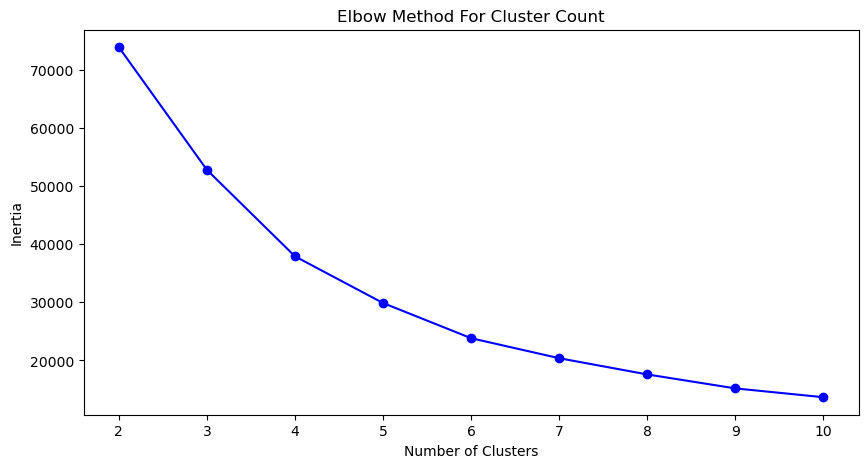

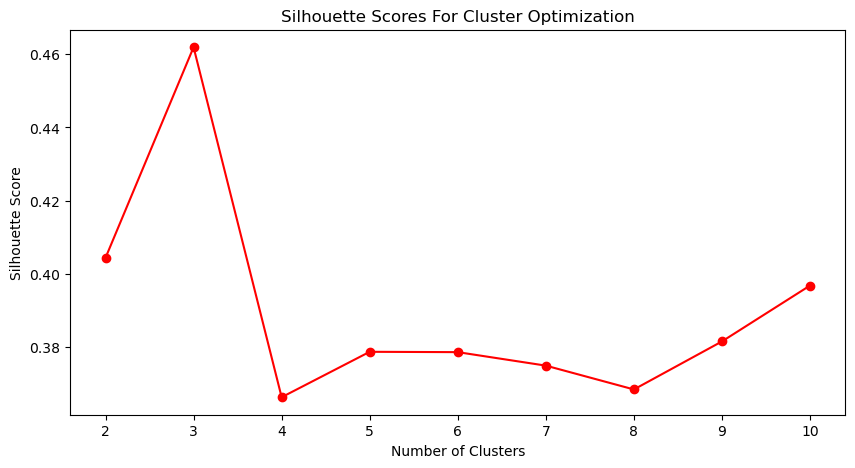

In [35]:
# Apply KMeans with a range of cluster sizes to use the elbow method
inertia = []
silhouetteScores = []
clusterRange = range(2, 11)

for n_clusters in clusterRange:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(principalComponents)
    
    inertia.append(kmeans.inertia_)
    silhouetteAvg = silhouette_score(principalComponents, kmeans.labels_)
    silhouetteScores.append(silhouetteAvg)

# Plotting the elbow method
plt.figure(figsize=(10, 5))
plt.plot(clusterRange, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Cluster Count')
plt.show()

# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(clusterRange, silhouetteScores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Cluster Optimization')
plt.show()



In [36]:
# KMeans cluster with three clusters
kMeans = KMeans(n_clusters=3, random_state=42)
hotelDF['cluster'] = kmeans.fit_predict(scaledFeatures)

In [37]:
cluster_centers = kmeans.cluster_centers_
cluster_centers

array([[-0.08575791, -0.03468458,  0.46659718,  2.27919036, -0.25459995,
        -0.15192109],
       [-0.4965341 , -0.77650831, -0.70419536,  0.28243048, -0.25459995,
        -0.15192109],
       [-0.83140357, -0.66146762, -0.81248292, -1.29594605, -0.2351955 ,
         6.58236445],
       [-0.36901022, -0.47941328, -0.50875396, -1.70146661, -0.25459995,
        -0.15192109],
       [-0.19376966, -0.10318741,  0.12073045,  0.20619892,  2.33912792,
        -0.15192109],
       [ 1.94466718, -0.08313413, -0.23265306,  0.1095552 , -0.25237166,
        -0.15192109],
       [ 0.16255789,  1.82884642,  1.70748432,  0.13234096, -0.14465896,
        -0.15192109],
       [-0.24879298,  0.3085383 ,  0.14784703,  0.28162782, -0.25459995,
        -0.15192109],
       [-0.27397868,  0.00965357,  1.09533263,  0.18750745,  5.03019215,
        -0.15192109],
       [-0.12279212,  5.53865955,  5.45183204, -0.01337796,  0.46349826,
        -0.12409347]])

In [38]:
pcaComponents = pd.DataFrame(pca.components_, columns=['lead_time', 'total_nights', 'total_price', 'no_of_adults', 'no_of_children', 'repeated_guest'])
pcaComponents

,lead_time,total_nights,total_price,no_of_adults,no_of_children,repeated_guest
0,0.164794,0.621025,0.650190,0.295522,0.168818,-0.220433
1,-0.549379,0.204593,0.245118,-0.414845,0.312146,0.571585


In [39]:
#view first five rows of dataframe
hotelDF[['lead_time','total_nights', 'total_price','no_of_adults','no_of_children', 'repeated_guest', 'cluster']].head()

,lead_time,total_nights,total_price,no_of_adults,no_of_children,repeated_guest,cluster
0,224,3,195.0,2,0,0,5
1,5,5,533.4,2,0,0,7
2,1,3,180.0,1,0,0,3
3,211,2,200.0,2,0,0,5
4,48,2,189.0,2,0,0,1


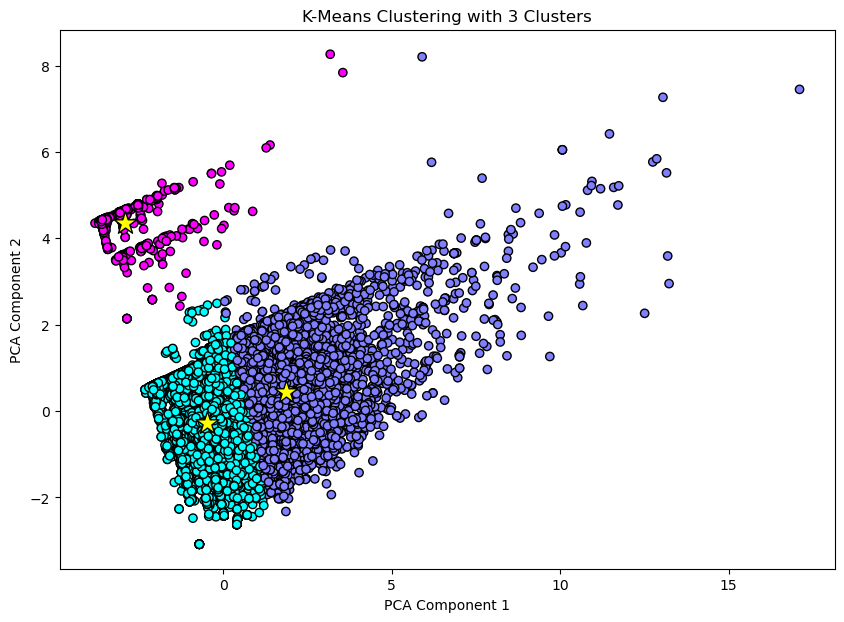

In [40]:
# Run KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(principalComponents)

# Add the cluster labels 
hotelDF['Cluster'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=cluster_labels, cmap='cool',edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Cluster Centers',edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with 3 Clusters')
plt.show()


In [41]:
#summary statistics for numeric columns only
numericColumns = hotelDF.select_dtypes(include='number')
summaryStats = numericColumns.groupby(hotelDF['Cluster']).mean()
summaryStats

,no_of_adults,no_of_children,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_nights,total_price,meal_plan,room_type,cluster,Cluster
Cluster,,,,,,,,,,,,,,,,,,
0,1.813446,0.042046,0.026726,87.046450,2017.807009,7.357487,15.493940,0.000000,0.000000,0.000000,100.609948,0.555560,2.405782,234.348577,0.933747,1.480310,3.801664,0.0
1,2.065653,0.285957,0.030638,90.153191,2017.882188,7.598541,16.041581,0.000122,0.000000,0.000122,122.372911,0.829909,5.195015,604.127838,0.991854,2.458779,5.538116,1.0
2,1.205224,0.031095,0.166667,14.659204,2017.779851,7.466418,14.712687,0.997512,0.951493,5.721393,75.909826,0.437811,1.860697,142.666642,0.966418,1.276119,2.014925,2.0


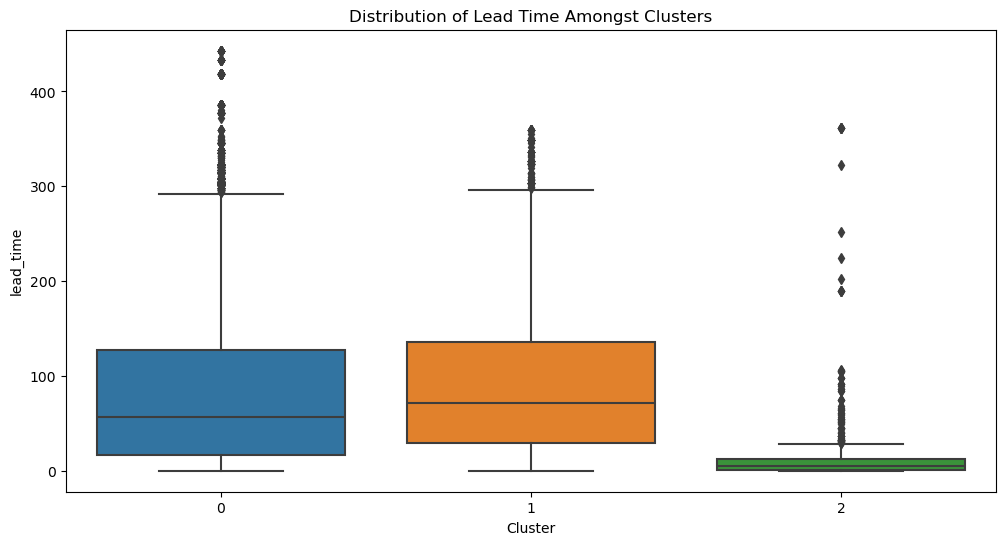

In [42]:
# Combine the cluster labels with the numeric data for visualization
numericColumns['Cluster'] = hotelDF['Cluster']

# Plot the distribution of a specific feature (e.g., total_price) across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='lead_time', data=numericColumns)
plt.title('Distribution of Lead Time Amongst Clusters')
plt.show()

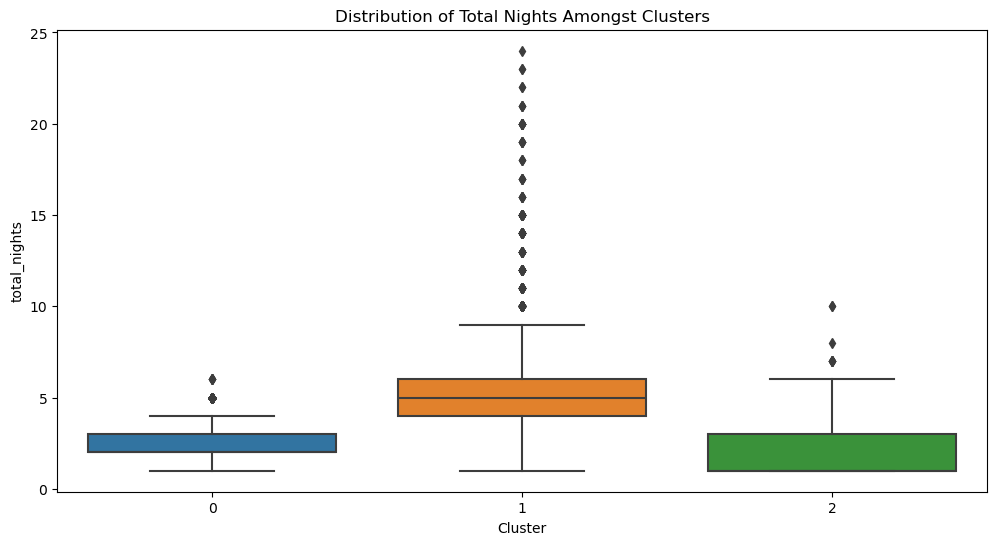

In [43]:
# Combine the cluster labels with the numeric data for visualization
numericColumns['Cluster'] = hotelDF['Cluster']

# Plot the distribution of a specific feature (e.g., total_price) across clusters
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='total_nights', data=numericColumns)
plt.title('Distribution of Total Nights Amongst Clusters')
plt.show()